Task 4: Churn Prediction Model

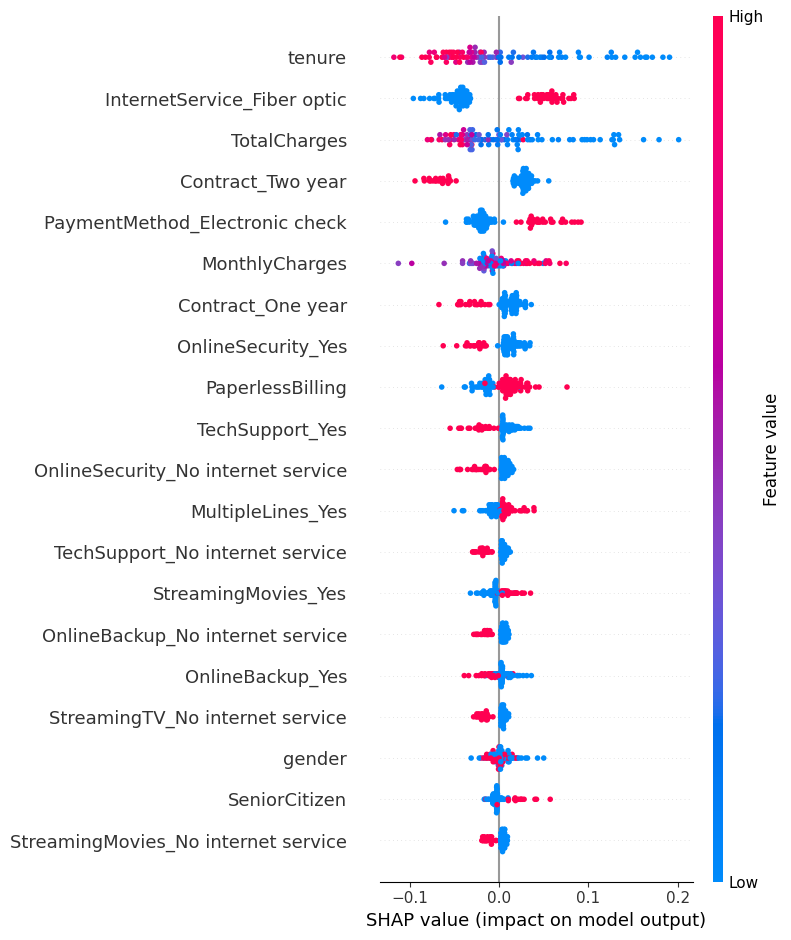

In [30]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

# Churn Prediction Model
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Churn Prediction Model Logistic Regression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_scaled, y_train)
y_lr_pred = lr.predict(X_test_scaled)

# Churn Prediction Model Decision Tree

model = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [3, 5, 7, 10]}
grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train, y_train)
y_dt_pred = grid.predict(X_test)

# Churn Prediction Model Random Forest Comparison

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

#CalibratedClassifierCV
calibrated_rf = CalibratedClassifierCV(rf, cv=5)
calibrated_rf.fit(X_train, y_train)
y_rf_prob = calibrated_rf.predict_proba(X_test)[:, 1]

# Models that need scaling
models_scaled = {"Logistic Regression": LogisticRegression(max_iter=5000)}

# Models that do NOT need scaling
models_unscaled = {"Decision Tree": grid,"Random Forest": rf,"Calibrated RF": CalibratedClassifierCV(rf, cv=5)}

# Shap sample indices
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
sample_indices = np.random.choice(X_test.shape[0], size=100, replace=False)

# Sample data and SHAP values together
X_sample = X_test.iloc[sample_indices]
shap_values_class_1 = shap_values[sample_indices, :, 1]

# Plot summary
shap.summary_plot(shap_values_class_1, X_sample, show=False)
plt.tight_layout()
plt.savefig("shap_summary.png")
plt.show()
